# EDA, RFM and Cohort

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [154]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are a total of 541,909 entries (or rows) with 8 columns. Every variable type is already correctly formatted, especially the Invoice Date, so there's no need to convert it anymore.

### Data Cleaning

In [156]:
# checking and removing duplicated values
print(df.duplicated().sum())
df = df[~df.duplicated()]

5268


In [157]:
# checking and removing empty values
print(df.isna().sum())
df = df.dropna()

print(len(df))

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64
401604


Since this task focuses on analyzing consumer behavior rather than creating a predictive model, and given that the amount of missing data is minimal compared to the total dataset, all empty data will be removed.

In [158]:
#A negative value in the quantity indicates that the product returned or cancelled order
df[df["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [159]:
# removing negative values in Quantity column
df = df[~df["Quantity"] < 0]
print(len(df))

392732


In [160]:
# checking invalid values if the quantity purchased is zero and the price is zero
print(len(df[df["Quantity"] == 0]))
print(len(df[df["UnitPrice"] == 0]))

0
40


In [161]:
# removing invalid price values
df = df[df["UnitPrice"] != 0]
print(len(df))

392692


In [162]:
# checking for other invalid values in both columns
cols2 = ["Quantity", "UnitPrice"]

for col in cols2:
    print(f"{col}: \nMin: {df[col].min()}\nMax: {df[col].max()}\nMean:{df[col].mean()}")

Quantity: 
Min: 1
Max: 80995
Mean:13.1197019547126
UnitPrice: 
Min: 0.001
Max: 8142.75
Mean:3.125913907082396


There is something unusual about the maximum quantity being excessively large and the minimum unit price being unusually low

In [163]:
df.nlargest(5, "Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom


In [164]:
df.nsmallest(5, "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom
217060,555876,16045,POPART WOODEN PENCILS ASST,100,2011-06-07 15:28:00,0.040,15799.0,United Kingdom


In [165]:
df.nlargest(5, "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom


The first two entries show excessively large quantity values, which are assumed to be data entry errors that likely correspond to different StockCodes. Therefore, these erroneous values will be removed. Similarly, the first four entries with very low unit prices, along with the product types, further support the suspicion of input errors.

In the third DataFrame, there are some anomalies observed in the Description column. Besides the minimum and maximum values that seem inconsistent, several products have unusual descriptions. These odd descriptions appear to be linked to StockCode values that are also unusual and not numeric

In [166]:
df = df[df["UnitPrice"] != 0.001]
df = df[(df["Quantity"] != 80995) & (df["Quantity"] != 74215)]

print(len(df))

392686


In [150]:
# Checking invalid products
# Filter for StockCode that contains only letters (no digits)
filtered_entries = df[df['StockCode'].str.contains(r'^[A-Za-z]+$', na=False)]
filtered_entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,Sales
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,12,2010,54.00
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,12,2010,15.00
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,12,2010,18.00
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,12,2010,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,12,2010,18.95
...,...,...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423.0,Belgium,12,2011,15.00
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany,12,2011,36.00
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,12,2011,18.00
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,12,2011,36.00


- POSTAGE/DOTCOM POSTAGE: This likely refers to the amount spent by the user on postage
- Manual: Given the lack of a clear definition, it might be a manual service offered alongside the purchase of an item
- There are a total of 1,394 anomalies. Because of these issues, we might consider deleting them to maintain the integrity of the dataset

In [148]:
filtered_entries["StockCode"].value_counts()

StockCode
POST    1099
M        279
DOT       16
Name: count, dtype: int64

In [149]:
filtered_entries["Description"].value_counts()

Description
POSTAGE           1099
Manual             279
DOTCOM POSTAGE      16
Name: count, dtype: int64

In [167]:
df = df[(df["Description"] != "POSTAGE") & (df["Description"] != "Manual") & (df["Description"] != "DOTCOM POSTAGE")]
len(df)

391292

so the remaining rows after cleaning are 391292

In [168]:
# final checking
cols2 = ["Quantity", "UnitPrice"]

for col in cols2:
    print(f"{col}: \nMin: {df[col].min()}\nMax: {df[col].max()}\nMean:{df[col].mean()}")

Quantity: 
Min: 1
Max: 4800
Mean:12.744239596005029
UnitPrice: 
Min: 0.04
Max: 649.5
Mean:2.8907839414043734


In [169]:
# adding additional columns for more insights and further analysis
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df["Sales"] = df['Quantity']*df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34


# Basic Analysis

In [170]:
df["Description"].nunique()

3872

There are 3,872 types of products in a total of 391292 entries or purchases

In [171]:
cols = ["Country", "InvoiceMonth", "InvoiceYear"]
unique = [df[col].value_counts() for col in cols]
unique

[Country
 United Kingdom          348911
 Germany                   8643
 France                    8021
 EIRE                      7224
 Spain                     2417
 Netherlands               2322
 Belgium                   1935
 Switzerland               1810
 Portugal                  1416
 Australia                 1180
 Norway                    1048
 Channel Islands            746
 Italy                      741
 Finland                    647
 Cyprus                     601
 Sweden                     427
 Austria                    384
 Denmark                    367
 Poland                     325
 Japan                      321
 Israel                     245
 Unspecified                241
 Singapore                  215
 Iceland                    182
 USA                        179
 Canada                     150
 Greece                     142
 Malta                      109
 United Arab Emirates        67
 European Community          57
 RSA                         57

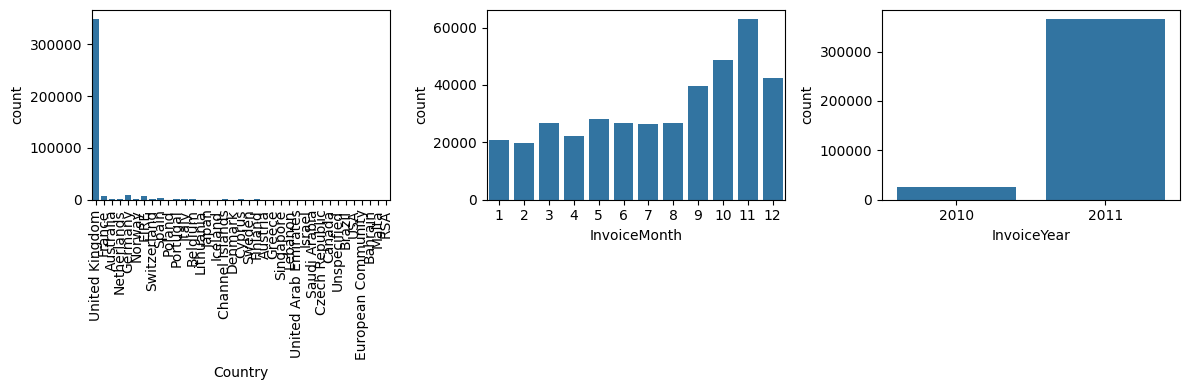

In [172]:
fig,axes = plt.subplots(1,3, figsize=(12,4))
axes = axes.flatten()
for col, ax in zip (cols, axes):
    sns.countplot(data=df, x=col, ax=ax)
    if col == "Country":
        ax.tick_params(axis="x", rotation=90)

plt.tight_layout()

UK customers drastically dominate the dataset, causing the other country classes to become highly unbalanced and obscured

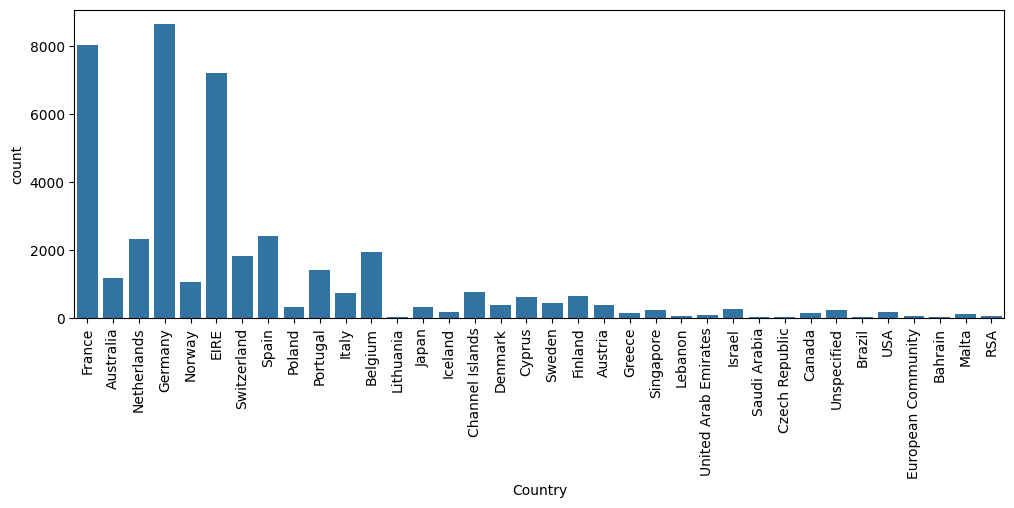

In [173]:
#Removing "United Kingdom" from the Country variable for a clearer view
plt.figure(figsize=(12,4))
sns.countplot(data=df[df["Country"]!="United Kingdom"], x="Country")
plt.xticks(rotation=90)
plt.show()

In [279]:
top_countrysales = df.groupby("Country").agg(
    total_quantity=("Quantity", "sum"),
    total_sales=("Sales", "sum"),
    num_customers=("CustomerID", "nunique")
).nlargest(11, "total_sales")

top_countrysales.reset_index(inplace=True)
top_countrysales

,Country,total_quantity,total_sales,num_customers
0,United Kingdom,4079143,6998842.12,3916
1,Netherlands,200258,283889.34,9
2,EIRE,140131,261888.12,3
3,Germany,118032,205381.15,94
4,France,110597,183987.94,87
5,Australia,83890,138103.81,9
6,Spain,27724,55706.56,30
7,Switzerland,29980,52441.95,21
8,Japan,26016,37416.37,8
9,Belgium,22962,36927.34,25


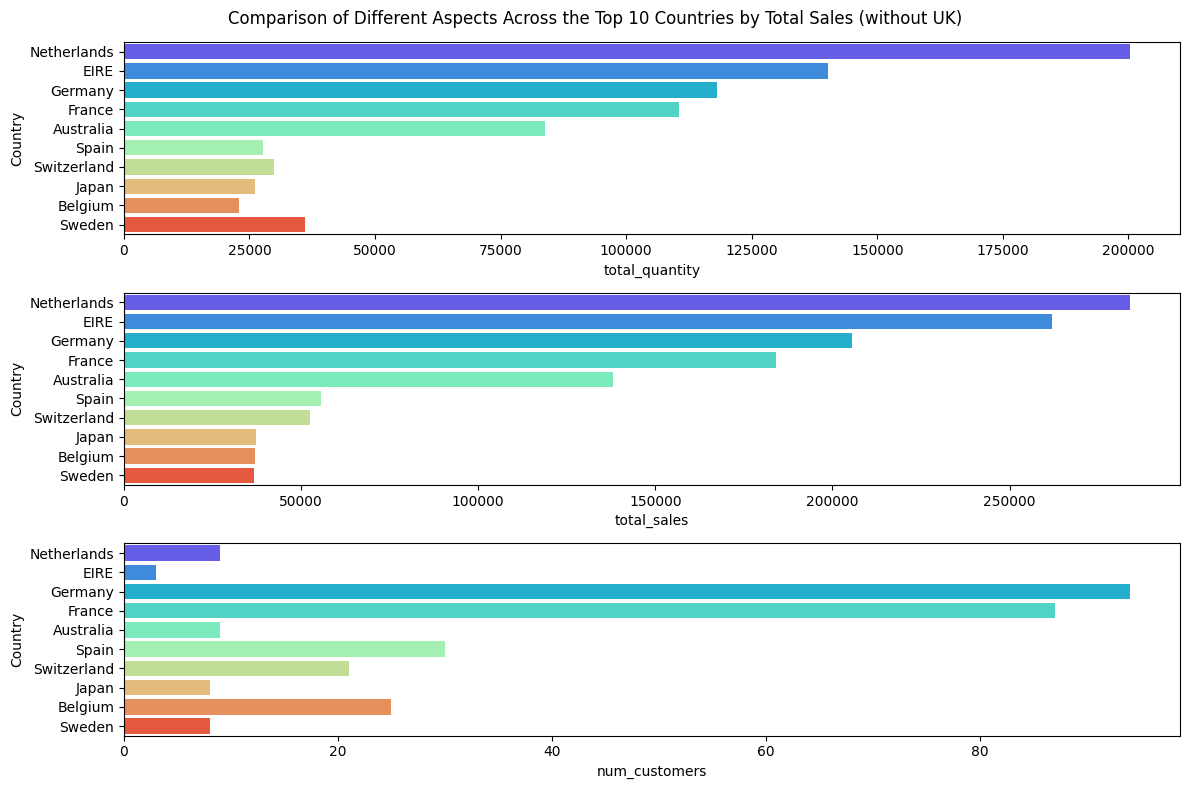

In [325]:
#Removing "United Kingdom" from the Country variable for a clearer view
top_countrysales2 = top_countrysales.iloc[1:]
cols = top_countrysales2.iloc[:,-3:].columns

fig,axes = plt.subplots(3,1, figsize=(12,8))
axes = axes.flatten()
for col, ax in zip (cols, axes):
    sns.barplot(data=top_countrysales2, y="Country", x=col, ax=ax, palette="rainbow")

plt.suptitle("Comparison of Different Aspects Across the Top 10 Countries by Total Sales (without UK)")
plt.tight_layout()

In [284]:
top_products = df.groupby("Description").agg(
    total_quantity=("Quantity", "sum"),
    total_sales=("Sales", "sum"),
    num_customers=("CustomerID", "nunique")
).nlargest(10, "total_quantity")

top_products.reset_index(inplace=True)
top_products

,Description,total_quantity,total_sales,num_customers
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,13558.41,307
1,JUMBO BAG RED RETROSPOT,46078,85040.54,635
2,WHITE HANGING HEART T-LIGHT HOLDER,36706,100392.10,856
3,ASSORTED COLOUR BIRD ORNAMENT,35263,56413.03,678
4,PACK OF 72 RETROSPOT CAKE CASES,33670,16381.88,635
5,POPCORN HOLDER,30919,23417.51,295
6,RABBIT NIGHT LIGHT,27153,51251.24,450
7,MINI PAINT SET VINTAGE,26076,16039.24,213
8,PACK OF 12 LONDON TISSUES,25329,7261.77,195
9,PACK OF 60 PINK PAISLEY CAKE CASES,24230,11611.00,410


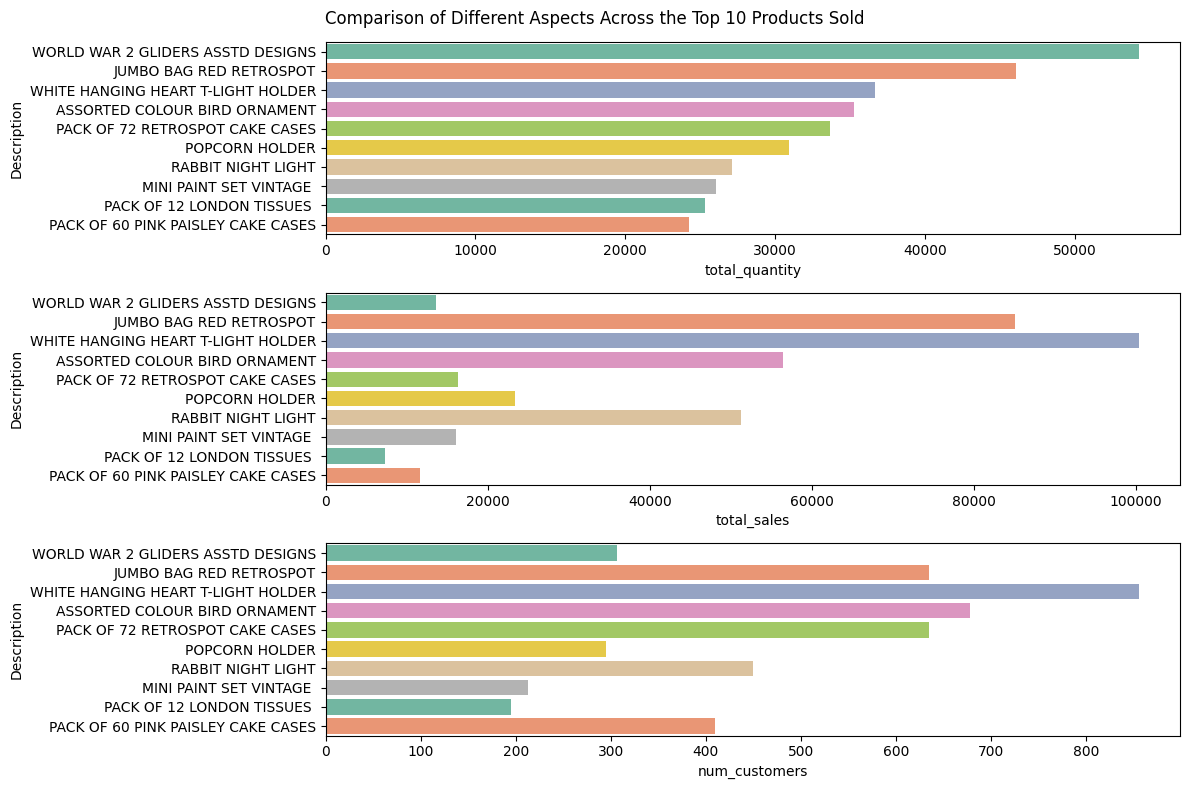

In [285]:
cols = top_products.iloc[:,-3:].columns

fig,axes = plt.subplots(3,1, figsize=(12,8))
axes = axes.flatten()
for col, ax in zip (cols, axes):
    sns.barplot(data=top_products, y="Description", x=col, ax=ax, palette="Set2")

plt.suptitle("Comparison of Different Aspects Across the Top 10 Products Sold")
plt.tight_layout()

In [322]:
top_products_UK = df[df["Country"]=="United Kingdom"].groupby("Description").agg(
    total_quantity=("Quantity", "sum"),
    total_sales=("Sales", "sum"),
).nlargest(10, "total_quantity")

top_products_UK.reset_index(inplace=True)
top_products_UK

,Description,total_quantity,total_sales
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086,12109.96
1,JUMBO BAG RED RETROSPOT,41878,77191.33
2,WHITE HANGING HEART T-LIGHT HOLDER,34630,94805.50
3,ASSORTED COLOUR BIRD ORNAMENT,32628,52228.68
4,POPCORN HOLDER,28923,21850.91
5,PACK OF 12 LONDON TISSUES,24321,6928.65
6,BROCADE RING PURSE,22675,5891.49
7,PACK OF 72 RETROSPOT CAKE CASES,22442,10989.60
8,VICTORIAN GLASS HANGING T-LIGHT,21876,27973.96
9,PACK OF 60 PINK PAISLEY CAKE CASES,19959,9480.35


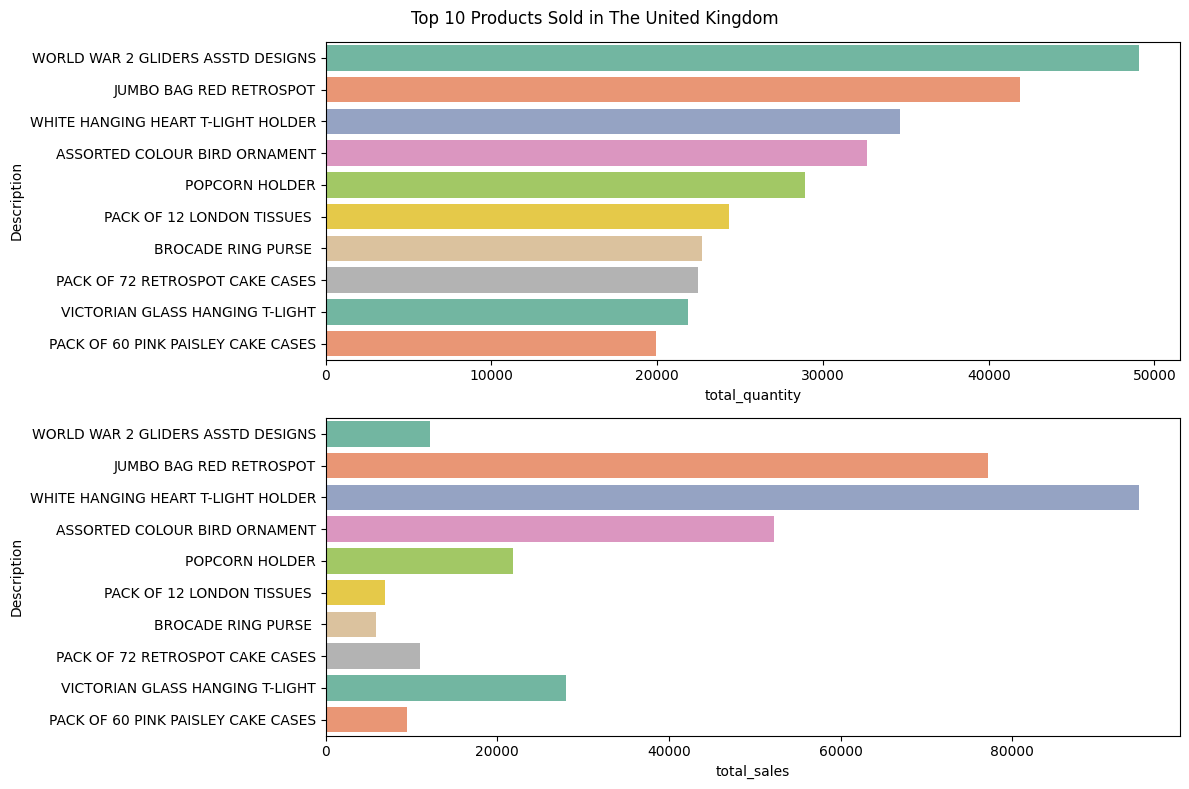

In [324]:
cols = top_products_UK.iloc[:,-2:].columns

fig,axes = plt.subplots(2,1, figsize=(12,8))
axes = axes.flatten()
for col, ax in zip (cols, axes):
    sns.barplot(data=top_products_UK, y="Description", x=col, ax=ax, palette="Set2")

plt.suptitle("Top 10 Products Sold in The United Kingdom")
plt.tight_layout()

The top 5 sold products in the UK are identical to the overall top 5 sold products in the dataset. The next five products show slight variations, but several products sold in the UK are also present in the overall top 6-10 sold products.

In [174]:
print(df["InvoiceDate"].min())
print(len(df[df["InvoiceYear"] == 2010]), "purchases in 2010")

print(df["InvoiceDate"].max())
print(len(df[df["InvoiceYear"] == 2011]), "purchases in 2011")

2010-12-01 08:26:00
25579 purchases in 2010
2011-12-09 12:50:00
365713 purchases in 2011


In [245]:
df_mod = df.copy()
df_mod['InvoiceDate']= df_mod['InvoiceDate'].dt.strftime('%Y-%m')
df_mod.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12,2.55,17850.0,United Kingdom,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12,3.39,17850.0,United Kingdom,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12,2.75,17850.0,United Kingdom,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12,3.39,17850.0,United Kingdom,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12,3.39,17850.0,United Kingdom,12,2010,20.34


In [304]:
date_sales = df_mod.groupby("InvoiceDate").agg(
    sum_sales = ("Sales", "sum"),
    avg_sales = ("Sales", "mean"),
    min_sales = ("Sales", "min"),
    max_sales = ("Sales", "max"),
)
date_sales.reset_index(inplace=True)
date_sales

,InvoiceDate,sum_sales,avg_sales,min_sales,max_sales
0,2010-12,565764.56,22.118322,0.14,3828.00
1,2011-01,485714.31,23.239919,0.19,6539.40
2,2011-02,442493.59,22.537109,0.18,3215.52
3,2011-03,583843.85,21.814521,0.19,2076.80
4,2011-04,454855.88,20.347852,0.12,6539.40
5,2011-05,659693.49,23.585752,0.19,3160.08
6,2011-06,653764.92,24.366029,0.10,38970.00
7,2011-07,592103.79,22.357038,0.10,3129.60
8,2011-08,635864.38,23.824068,0.12,4176.00
9,2011-09,939682.63,23.771379,0.12,7144.72


In [310]:
df_mod_noUK = df_mod[df_mod["Country"]!="United Kingdom"]

date_sales_noUK = df_mod_noUK.groupby("InvoiceDate").agg(
    sum_sales = ("Sales", "sum"),
    avg_sales = ("Sales", "mean"),
    min_sales = ("Sales", "min"),
    max_sales = ("Sales", "max"),
)
date_sales_noUK.reset_index(inplace=True)
date_sales_noUK

,InvoiceDate,sum_sales,avg_sales,min_sales,max_sales
0,2010-12,69530.39,32.354765,0.29,3794.4
1,2011-01,122115.98,40.746073,0.85,1752.0
2,2011-02,87980.03,41.756065,0.29,700.8
3,2011-03,118356.73,38.502515,0.42,1224.0
4,2011-04,48786.33,28.347664,0.42,429.6
5,2011-05,117861.40,38.988224,0.65,1392.0
6,2011-06,130762.46,38.607163,0.42,996.0
7,2011-07,108830.69,34.538461,0.19,2365.2
8,2011-08,141780.13,37.183354,0.84,1260.0
9,2011-09,150070.01,35.014001,0.85,830.0


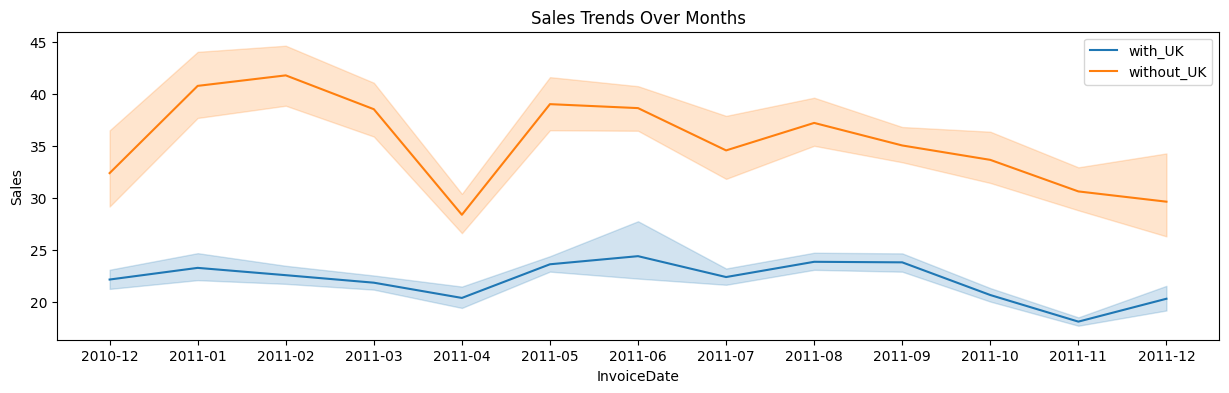

In [321]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_mod, x='InvoiceDate', y="Sales", label="with_UK")
sns.lineplot(data=df_mod_noUK, x='InvoiceDate', y="Sales", label="without_UK")
plt.title("Sales Trends Over Months")
plt.legend()
plt.show()

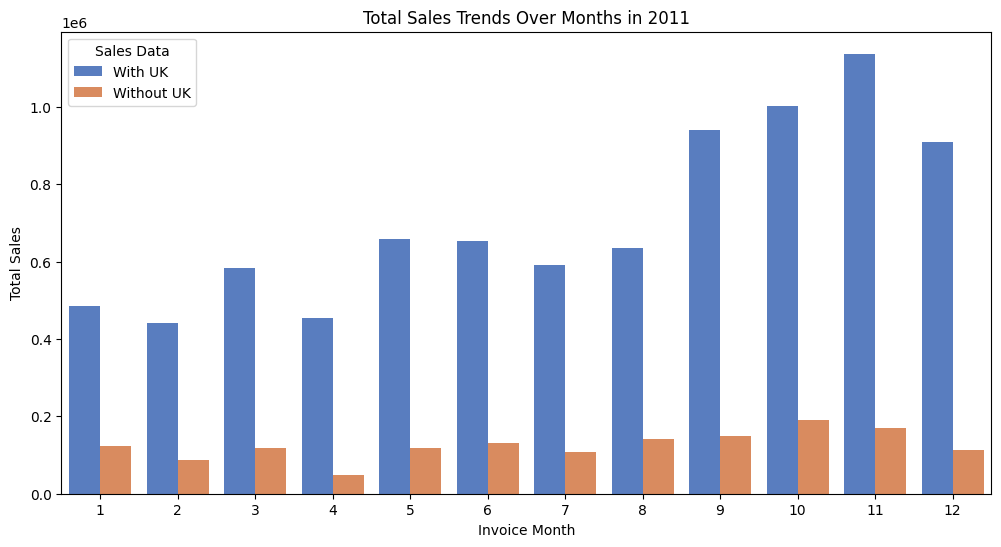

In [320]:
monthly_sales = df_mod[df_mod["InvoiceYear"] != "2010"].groupby("InvoiceMonth")["Sales"].sum().reset_index()
monthly_sales2 = df_mod_noUK[df_mod_noUK["InvoiceYear"] != "2010"].groupby("InvoiceMonth")["Sales"].sum().reset_index()
monthly_sales['Source'] = 'With UK'
monthly_sales2['Source'] = 'Without UK'
combined_sales = pd.concat([monthly_sales, monthly_sales2], axis=0)

plt.figure(figsize=(12, 6))
sns.barplot(data=combined_sales, x="InvoiceMonth", y="Sales", hue="Source", palette="muted")

plt.title("Total Sales Trends Over Months in 2011")
plt.ylabel("Total Sales")
plt.xlabel("Invoice Month")
plt.legend(title='Sales Data')
plt.show()

From the graph, there's something unique to note: the average sales for the UK are quite small despite the huge total sales, and vice versa for the non-UK data. This scenario occurs due to the low transaction volume combined with high-value purchases. Here’s a breakdown of why that can happen:
- Fewer Purchases: If a region has a smaller number of purchases overall, it can lead to fewer transactions.
- High-Value Purchases: When those few purchases are for high-ticket items, it inflates the total sales significantly.
- Average Calculation: Since the average is calculated by dividing total sales by the number of transactions, fewer transactions can lead to a smaller average, even if total sales are high.
- Luxury Items: Regions focusing on luxury or premium items will show high total sales but lower average sales due to the limited number of transactions.

# RFM

- Recency (R): Measures how recently a customer made a purchase. More recent purchases indicate higher engagement.
- Frequency (F): Measures how often a customer makes purchases. Higher frequency suggests greater loyalty and repeat business.
- Monetary (M): Measures how much money a customer spends. Higher spending indicates more valuable customers.

In [333]:
recency = pd.DataFrame(df.groupby('CustomerID')['InvoiceDate'].max().reset_index()) #the most recent invoice date of each customer
recency['MaxDate'] = recency['InvoiceDate'].max() # The most recent invoice date across all customers
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency.sort_values(by='recency', ascending=False)
recency

,CustomerID,InvoiceDate,MaxDate,recency
354,12791.0,2010-12-01 11:27:00,2011-12-09 12:50:00,374
4176,18074.0,2010-12-01 09:53:00,2011-12-09 12:50:00,374
1036,13747.0,2010-12-01 10:37:00,2011-12-09 12:50:00,374
4060,17908.0,2010-12-01 11:45:00,2011-12-09 12:50:00,374
4104,17968.0,2010-12-01 12:23:00,2011-12-09 12:50:00,374
...,...,...,...,...
3820,17581.0,2011-12-09 12:21:00,2011-12-09 12:50:00,1
580,13113.0,2011-12-09 12:49:00,2011-12-09 12:50:00,1
572,13102.0,2011-12-08 12:52:00,2011-12-09 12:50:00,1
136,12518.0,2011-12-09 10:13:00,2011-12-09 12:50:00,1


- Out of a total of 391292 transactions, the total number of buyers is 4334
- The longest duration without a purchase for customers after their last transaction is 374 days

In [331]:
frequency = pd.DataFrame(df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()) #the amount of dates of each customer
frequency.columns = ['CustomerID', 'frequency']
frequency = frequency.sort_values(by='frequency', ascending=False)
frequency

,CustomerID,frequency
325,12748.0,207
1878,14911.0,199
4007,17841.0,124
1660,14606.0,93
561,13089.0,93
...,...,...
2882,16275.0,1
2881,16274.0,1
1414,14271.0,1
2878,16270.0,1


Customer ID 12748.0 is the most frequent purchaser

In [332]:
monetary = pd.DataFrame(df.groupby('CustomerID')['Sales'].sum().reset_index())
monetary.columns = ['CustomerID','monetary']
monetary = monetary.sort_values(by='monetary', ascending=False)
monetary

,CustomerID,monetary
1688,14646.0,279138.02
4197,18102.0,259657.30
3725,17450.0,194390.79
1878,14911.0,140336.83
54,12415.0,124564.53
...,...,...
4094,17956.0,12.75
1792,14792.0,6.20
3012,16454.0,5.90
3215,16738.0,3.75


Customer ID 14646.0 is the most loyal, spending the highest amount of money

In [178]:
df_rfm = pd.concat([recency["CustomerID"], recency.iloc[:,-1],frequency.iloc[:,-1],monetary.iloc[:,-1]], axis=1)
df_rfm

,CustomerID,recency,frequency,monetary
0,12347.0,2,7,4310.00
1,12348.0,75,4,1437.24
2,12349.0,19,1,1457.55
3,12350.0,310,1,294.40
4,12352.0,36,7,1385.74
...,...,...,...,...
4329,18280.0,278,1,180.60
4330,18281.0,181,1,80.82
4331,18282.0,8,2,178.05
4332,18283.0,4,16,2039.58


## Cohort

A cohort is a group of individuals sharing a common characteristic or experience within a specific time frame, often used in business to analyze customer behavior over time. Cohort analysis tracks metrics like retention rates and lifetime value, helping businesses understand patterns and trends to improve customer engagement and inform strategies for growth.

In [179]:
df_cohort = df.copy()
df_cohort['cohort'] = df_cohort.apply(lambda row: (row['InvoiceYear'] * 100) + (row['InvoiceMonth']), axis=1)
# 2017 * 100 = 201700 
# aug -> 201700 + 08 = 201708

# To get each customer's earliest cohort (their first purchase)
first_cohorts = df_cohort.groupby('CustomerID')['cohort'].min().reset_index()
first_cohorts.columns = ['CustomerID', 'first_cohort']
df_cohort = df_cohort.merge(first_cohorts, on='CustomerID', how='left')

first_cohorts

,CustomerID,first_cohort
0,12347.0,201012
1,12348.0,201012
2,12349.0,201111
3,12350.0,201102
4,12352.0,201102
...,...,...
4329,18280.0,201103
4330,18281.0,201106
4331,18282.0,201108
4332,18283.0,201101


In [180]:
cohort_count = df_cohort['cohort'].value_counts().reset_index().sort_values(by='cohort').reset_index(drop=True)
cohort_count

,cohort,count
0,201012,25579
1,201101,20900
2,201102,19634
3,201103,26764
4,201104,22354
5,201105,27970
6,201106,26831
7,201107,26484
8,201108,26690
9,201109,39530


In [181]:
headers = cohort_count["cohort"].tolist()
headers

[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

In [118]:
print(df_cohort["cohort"].isna().sum())
print(df_cohort["first_cohort"].isna().sum())

0
0


In [182]:
#df_cohort.dropna(inplace=True)
df_cohort['cohort_distance'] = df_cohort.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort']))
                                     if (row['first_cohort'] != 0 and row['cohort'] != 0) else np.nan, axis=1)
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,Sales,cohort,first_cohort,cohort_distance
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,201012,201012,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,201012,201012,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,201012,201012,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,201012,201012,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,201012,201012,0


In [341]:
cohort_pivot = pd.pivot_table(df_cohort,
                              index='first_cohort',
                              columns='cohort_distance',
                              values='CustomerID',
                              aggfunc=pd.Series.nunique)
cohort_pivot = cohort_pivot.rename_axis("Cohort Period", axis="index")

cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Period,,,,,,,,,,,,,
201012,885.0,323.0,286.0,339.0,320.0,352.0,320.0,308.0,312.0,350.0,330.0,444.0,235.0
201101,415.0,91.0,111.0,95.0,133.0,120.0,103.0,100.0,124.0,136.0,152.0,49.0,NaN
201102,380.0,71.0,71.0,109.0,103.0,93.0,97.0,104.0,94.0,116.0,26.0,NaN,NaN
201103,452.0,67.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
201104,300.0,63.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
201105,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
201106,242.0,42.0,38.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
201107,187.0,33.0,38.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,169.0,34.0,41.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The values inside represent unique Customer IDs, counted only once for each cohort range


In [342]:
cohort_pivot_div = cohort_pivot.div(cohort_pivot[0],axis=0)
cohort_pivot_div

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Period,,,,,,,,,,,,,
201012,1.0,0.364972,0.323164,0.383051,0.361582,0.397740,0.361582,0.348023,0.352542,0.395480,0.372881,0.501695,0.265537
201101,1.0,0.219277,0.267470,0.228916,0.320482,0.289157,0.248193,0.240964,0.298795,0.327711,0.366265,0.118072,NaN
201102,1.0,0.186842,0.186842,0.286842,0.271053,0.244737,0.255263,0.273684,0.247368,0.305263,0.068421,NaN,NaN
201103,1.0,0.148230,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
201104,1.0,0.210000,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
201105,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.091549,NaN,NaN,NaN,NaN,NaN
201106,1.0,0.173554,0.157025,0.264463,0.231405,0.330579,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.176471,0.203209,0.224599,0.272727,0.112299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.201183,0.242604,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The percentage of each cohort's customers relative to the first cohort

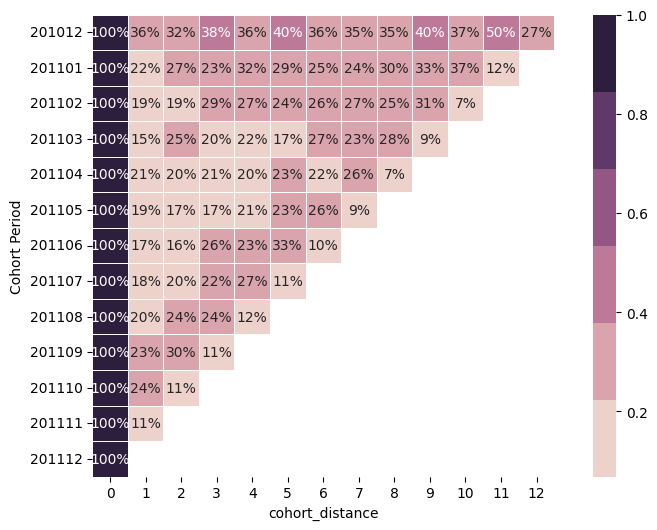

In [343]:
plt.subplots(figsize=(10, 6))
sns.heatmap(cohort_pivot_div, annot=True, fmt='.0%', square=True, linewidths=.5,cmap=sns.cubehelix_palette(6))

plt.show()

There are some surged retentions, for instances, in the first row of months 3, 5, 9, and 11, this is possibly due to:
- Special Promotions/Discounts: There may have been promotional campaigns during months 3, 5, 9, and 11, leading to higher customer activity
- Seasonality: These months might coincide with seasonal shopping trends or annual events, causing spikes in purchases
- Product/Service Release: New product launches or features during these months could have driven customer interest and return purchases
- Customer Lifecycle: Customers may follow a natural purchase cycle, becoming more active after a few months of their initial order
- Data Anomalies/Processing Errors: There might be errors in cohort calculation or data processing that led to unusual results